# This is a 5-part Project based on comments scrapped from Veritasium's YouTube Video titled "This is why we can't have nice things".<br>
### Part 1: Scraping comments from the YouTube Video<br>
### Part 2: Sentiment Analysis<br>
### Part 3: Performing EDA on Positive comments<br>
### Part 4: Performing EDA on Negative comments<br>
### Part 5: Analyzing the Emojis
<br>

---



##Part 1: Scraping Comments from the YouTube Video








In [ ]:
#Installing Chrome Driver and Selenium in Google Colab

!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (100.0.4896.127-0ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
cp: '/usr/lib/chromium-browser/chromedriver' and '/usr/bin/chromedriver' are the same file


In [ ]:
#Importing the required libraries

import time

from selenium import webdriver
from selenium.webdriver import Chrome 
from selenium.webdriver.common.by import By 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [ ]:
#Defining a function that fetches the comments from the desired video 

def ScrapeComments(path):
  authors = []                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
  try:
    # Configuring the ChromeDriver
    options = webdriver.ChromeOptions()
    options.add_argument('-headless')
    options.add_argument('-no-sandbox')
    options.add_argument('-disable-dev-shm-usage')
    driver =webdriver.Chrome('chromedriver',options=options)
    wait = WebDriverWait(driver,15)
    driver.get(path)
    
    # Expanding Comments 6 times to load atleast 100 comments
    for item in range(6):
      wait.until(EC.visibility_of_element_located((By.TAG_NAME,"body"))).send_keys(Keys.END)
      time.sleep(5)
    
    # Scrapping all the comments and their author
    for author in wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"style-scope ytd-comment-renderer"))):
      authors.append(author.text)
    
  except Exception as e:
    print(e)
  return authors

# Driver Code

path = "https://www.youtube.com/watch?v=j5v8D-alAKE"
data = ScrapeComments(path)
data

['Louis Rossmann\n1 year ago\n8.5 million people watch you, and you planted a seed today in their mind about right to repair. Thank you.\n99K\nREPLY',
 "Zan\n3 months ago\nThe fact that it's so well known and still being allowed to exist is criminal\n1.3K\nREPLY",
 "Potato\n4 days ago\nImagine just how advanced we would be if it wasn't for business practices like this\n247\nREPLY",
 "nikkiwolf22\n2 months ago (edited)\nAs someone that took an entire course on and wrote a paper around planned obsolescence (among similar topics, and how those topics interact in the real world) in college, I can fully back this video up, this was basically a semester's worth of class summed up brilliantly in 20 minutes\n138\nREPLY",
 'SneakySolidSnake\n4 days ago\npeople thought: "in a hundred years, we\'ll have flying cars."  what really happens in a hundred years is, "we\'ll focus on making tires break in a safe way."\n131\nREPLY',
 'Matilda Hinanawi\n2 months ago\nThis is why a rise in personal manufac

In [ ]:
# Importing the Regular Expression 're' and 'Pandas' libraries

import re
import pandas as pd

In [ ]:
# Cleaning the raw data (comments) and storing them in a DataFrame to perform EDA later

def create_df(data):
  author_comment = []
  author=[]
  for item in data:
    s = re.sub('\\n[0-9]+ (days|weeks|months|years|week|month|year|hours|hour|day|minutes|minute) ago' ,'',item)
    s = re.sub('\\nREPLY','',s)
    s = re.sub('\.\\n[0-9][\.]*[0-9]*[A-Z]*','',s)
    t = s.split('\n')
    t[0] = re.sub('\(edited\)','',t[0])
    author.append(t[0])
    s = "\n".join(t[1:])
    author_comment.append(s)
  df = pd.DataFrame(author_comment,index=author,columns=["Comments"])
  return df
comments_df = create_df(data)
comments_df

,Comments
Louis Rossmann,"8.5 million people watch you, and you planted ..."
Zan,The fact that it's so well known and still bei...
Potato,Imagine just how advanced we would be if it wa...
nikkiwolf22,As someone that took an entire course on and w...
SneakySolidSnake,"people thought: ""in a hundred years, we'll hav..."
...,...
Pranjal Kandhari,Awesome video! Want a similar one for pharmace...
PeachyTheSpaceCadet,"Idk if it’s phenomenal, but I have a glow ball..."
Zizkov Hood Moments,he manages to make a video about one of the mo...
Candice Assell,The person who thought the never-ending lightb...


##Part 2: Sentiment Analysis

In [ ]:
# Installing and Importing the TextBlob library

!pip install textblob
from textblob import TextBlob

In [ ]:
# Creating an empty list to store the polarity of the comments

polarity=[]

# Starting the for loop to extract each row and then find it's corresponding polarity

# Here comment will take each row under 'Comments' column of our DataFrame named 'comments_df'

for comment in comments_df['Comments']:
    # append() --> This function will add the resultant value in the list named 'polarity'
    # TextBlob(comment).sentiment.polarity --> This function here is taking the particular comment as input and based on that returns its polarity
    polarity.append(TextBlob(comment).sentiment.polarity)

In [ ]:
# Adding the Polarity just calculated to the DataFrame

comments_df['Polarity'] = polarity

# Displaying the first 5 rows in our DataFrame via head() function

comments_df.head()

,Comments,Polarity
Louis Rossmann,"8.5 million people watch you, and you planted ...",0.285714
Zan,The fact that it's so well known and still bei...,-0.400000
Potato,Imagine just how advanced we would be if it wa...,0.400000
nikkiwolf22,As someone that took an entire course on and w...,0.233333
SneakySolidSnake,"people thought: ""in a hundred years, we'll hav...",0.350000


##Part 3: Performing EDA on Positive comments

In [ ]:
# Getting the positive polarity comments. Here, we will consider a polarity between 0.5 to 1.

positive_comments = comments_df[comments_df['Polarity']>=0.5]

# Seeing First 5 rows of our positive comments via head() function

positive_comments.head()

,Comments,Polarity
EsrikZ GAMING,"Products aren’t made to be good for you, they ...",0.7000
alok,Trust me if you don't even know what you are d...,0.6275
T M,Okay. I never want to be scolded about environ...,0.5000
Jimmer Kerlin,Great show. Incredibly informative.\nThank you!!!,0.9000
Why,it took me a while to realize that this video ...,0.6000


In [ ]:
# Installing and importing 'wordcloud' library to perform Exploratory Data Analysis

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Stopwords --> A stop word is a commonly used word (such as “the”, “a”, “an”, “in”)
# We would not want these words to take up space in our DataFrame, or taking up valuable processing time. 
# For this, we can remove them easily, by storing a list of words that you consider to stop words.

# set() function will give us an ordered list with unique stop words arranged in ascending order

stopwords = set(STOPWORDS)

In [ ]:
# Joining all the positive comments with a ' ' (space) between the lines, so later we can generate a wordcloud out of it.

total_positive_comments = ' '.join(positive_comments['Comments'])

In [ ]:
# Creating a WordCloud Object

wordcloud_obj1 = WordCloud(width = 1000, height=500, stopwords=stopwords)

In [ ]:
# generate() function will generate a wordcloud from text

wordcloud_obj1.generate(total_positive_comments)

In [ ]:
# Importing the 'Matplotlib' library to plot the wordcloud

import matplotlib.pyplot as plt
%matplotlib inline

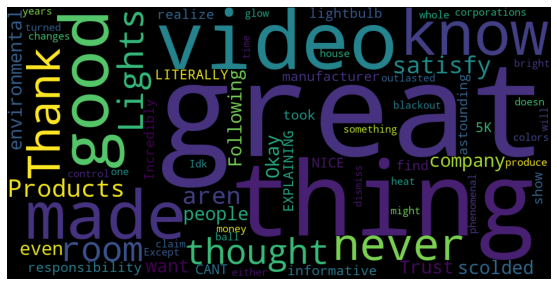

In [ ]:
# Plotting the generated Word Cloud

plt.figure(figsize=(15,5))

plt.imshow(wordcloud_obj1)

plt.axis('off')

plt.show()

##Part 4: Performing EDA on Negative comments

In [ ]:
# Getting the negative polarity comments. Here, we will consider a polarity between -1 to -0.25.

negative_comments = comments_df[comments_df['Polarity']<=-0.25]

# Seeing First 5 rows of our negative comments via head() function

negative_comments.head()

,Comments,Polarity
Zan,The fact that it's so well known and still bei...,-0.400000
Jellyf0x,The thing I hate most about planned obsolescen...,-0.356250
omni rhythm,"15:40 LED bulbs aren't immune to this, they ca...",-0.270000
SoulfoodFight,Imagine the trillions of tons of unnecessary g...,-0.700000
A G,"As an electrical engineer, I can assure you......",-0.358333


In [ ]:
# Joining all the negative comments with a ' ' (space) between the lines, so later we can generate a wordcloud out of it.

total_negative_comments = ' '.join(negative_comments['Comments'])

In [ ]:
# Creating a WordCloud Object

wordcloud_obj2 = WordCloud(width = 1000, height=500, stopwords=stopwords)

In [ ]:
# generate() function will generate a wordcloud from text

wordcloud_obj2.generate(total_negative_comments)

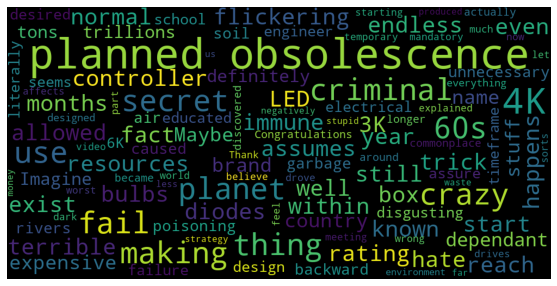

In [ ]:
# Plotting the generated Word Cloud

plt.figure(figsize=(15,5))

plt.imshow(wordcloud_obj2)

plt.axis('off')

plt.show()

##Part 5: Analyzing the Emojis

In [ ]:
# Installing and importing the 'Emoji' library 

!pip install emoji
import emoji

     |████████████████████████████████| 175 kB 5.4 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=8cd334451aa531fef239e88f9d0f40c26aefd820119c52100a0e8e897d2568d6
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
# Defining an empty string to store each emoji that is extracted

s = ''

for i in comments_df['Comments']:
    lis = [p for p in i if p in emoji.EMOJI_DATA]
    for element in lis:                                       
        s = s+element

In [ ]:
# We have all the emojis stored in a string 's'
# We now store the emoji as the key and its count as the value in a dictionary named 'result'

result = {}

for j in set(s):
    result[j] = s.count(j)

In [ ]:
# Sorting the 'result' dictionary based on the count each emoji appears in ascending order

final = {}

for key,value in sorted(result.items(), key= lambda item:item[1]):
    final[key]=value

In [ ]:
# Unzipping the above dictionary using the * operator

Keys = [*final.keys()]

Values = [*final.values()]

In [ ]:
# Creating a Dataframe to store the top 3 emojis

top_3_emojis = pd.DataFrame({'emojis':Keys[-3:],'count':Values[-3:]})

In [ ]:
# Importing the 'Plotly' library for visualization

import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
# Creating an object named 'trace' that will create a bar graph with the emojis in X-axis and their respective count in Y-axis

trace = go.Bar(x=top_3_emojis['emojis'], y=top_3_emojis['count'])

In [ ]:
# Plotting the graph by passing the object in iplot

iplot([trace])